Q-1. Download the CIFAR-10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html). Hint:
Use pickle library to load the dataset. [5 marks]

In [1]:
# function using pickle to load dataset

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [2]:
#loading dataset into data_batch_1.....6 including test and training dataset.

import numpy
from collections import ChainMap

file1=r'/home/piyushg/Codes/cifar-10-batches-py/data_batch_1'
file2=r'/home/piyushg/Codes/cifar-10-batches-py/data_batch_2'
file3=r'/home/piyushg/Codes/cifar-10-batches-py/data_batch_3'
file4=r'/home/piyushg/Codes/cifar-10-batches-py/data_batch_4'
file5=r'/home/piyushg/Codes/cifar-10-batches-py/data_batch_5'
file6=r'/home/piyushg/Codes/cifar-10-batches-py/test_batch'

data_batch_1=unpickle(file1)
data_batch_2=unpickle(file2)
data_batch_3=unpickle(file3)
data_batch_4=unpickle(file4)
data_batch_5=unpickle(file5)

test_batch=unpickle(file6)

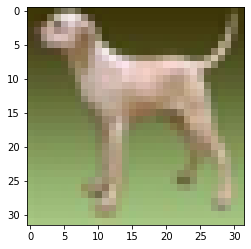

In [3]:
#Image preprocessing reshape and tranpose is performed
import matplotlib.pyplot as plt

#Processing whole batch
data=data_batch_1[b'data']
data1=data_batch_1[b'data']
data2=data_batch_2[b'data']
data3=data_batch_3[b'data']
data4=data_batch_4[b'data']
data5=data_batch_5[b'data']
test=test_batch[b'data']

data=data.reshape(len(data),3,32,32).transpose(0,2,3,1)
data1=data1.reshape(len(data),3,32,32).transpose(0,2,3,1)
data2=data2.reshape(len(data),3,32,32).transpose(0,2,3,1)
data3=data3.reshape(len(data),3,32,32).transpose(0,2,3,1)
data4=data4.reshape(len(data),3,32,32).transpose(0,2,3,1)
data5=data5.reshape(len(data),3,32,32).transpose(0,2,3,1)

test_data=test.reshape(len(test),3,32,32).transpose(0,2,3,1)

plt.imshow(data1[9999])

Q-2. Implement the image transformation methods mentioned below: [5x4=20 marks]
(a) Random Rotation in the range [−180◦,180◦ ]
(b) Random cutout (randomly erase a block of pixels from the image with the width and height
of the block in the range 0 to 16 pixels. The erased part (cutout) should be filled with a
single value)
(c) Random Crop (Add a padding of 2 pixels on all sides and randomly select a block of 32x32
pixels from the padded image)
(d) Contrast & Horizontal flipping. (First, change the contrast of the image with a factor of
α randomly selected from the range (0.5, 2.0) and then flip the image horizontally with a
probability of 0.5

Text(0.5, 1.0, 'After rotation')

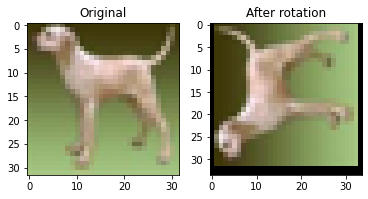

In [31]:
#Function to implement Rotation operation 
import numpy as np
import math
import random

def rotation(picture):
    image = picture.copy()             # deep copy is done to load image
    angle=random.randint(-180,180)               # random angle generation withtin range -180 to 180

    angle=math.radians(angle)                               #degree to radian conversion
    cosine=math.cos(angle)
    sine=math.sin(angle)
    height=image.shape[0]                                   #height of the image
    width=image.shape[1]                                    #width of the image

    # Define the height and width of the new image that is to be formed
    new_height  = round(abs(image.shape[0]*cosine)+abs(image.shape[1]*sine))+1
    new_width  = round(abs(image.shape[1]*cosine)+abs(image.shape[0]*sine))+1

    # define another image variable of dimensions of new_height and new _column filled with zeros
    output=np.zeros((new_height,new_width,image.shape[2]))

    # Find the centre of the image about which we have to rotate the image
    original_centre_height   = round(((image.shape[0]+1)/2)-1)    #with respect to the original image
    original_centre_width    = round(((image.shape[1]+1)/2)-1)    #with respect to the original image

    # Find the centre of the new image that will be obtained
    new_centre_height= round(((new_height+1)/2)-1)        #with respect to the new image
    new_centre_width= round(((new_width+1)/2)-1)          #with respect to the new image

    for i in range(height):
        for j in range(width):
            #co-ordinates of pixel with respect to the centre of original image
            y=image.shape[0]-1-i-original_centre_height                   
            x=image.shape[1]-1-j-original_centre_width                      

            #co-ordinate of pixel with respect to the rotated image
            new_y=round(-x*sine+y*cosine)
            new_x=round(x*cosine+y*sine)

            '''since image will be rotated the centre will change too, 
               so to adust to that we will need to change new_x and new_y with respect to the new centre'''
            new_y=new_centre_height-new_y
            new_x=new_centre_width-new_x

            # adding if check to prevent any errors in the processing
            if 0 <= new_x < new_width and 0 <= new_y < new_height and new_x>=0 and new_y>=0:
                output[new_y,new_x,:]=image[i,j,:]                          #writing the pixels to the new destination in the output image
    return output.astype('uint8')

plt.figure()
plt.subplot(1,2,1)
plt.imshow(data[9999])
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(rotation(data[9999]))
plt.title('After rotation')


Text(0.5, 1.0, 'After random cutout')

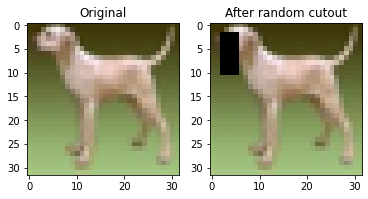

In [17]:
#Function to implement Random cutout operation 
import random

#plt.imshow(data[9994])

def extractSubMatrix(matrix):
    w=random.randint(0,16)
    h=random.randint(0,16)
    start=random.randint(0,31)

    result=matrix.copy()
    result[start:w+1,start:h+1,:]=0     #Setting cutout area as black
    return result

#plt.imshow()

plt.figure()
plt.subplot(1,2,1)
plt.imshow(data[9999])
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(extractSubMatrix(data[9999]))
plt.title('After random cutout')


Text(0.5, 1.0, 'After random crop')

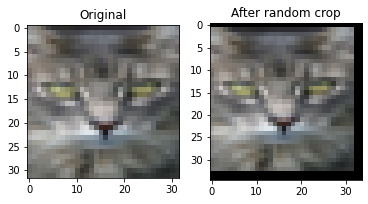

In [18]:
#Function to implement Random crop operation 
import numpy as np
import random

def RandomCrop(image):
    new_array= np.zeros((36, 36, 3))  #Creating new 36*36 new Image(2pixel padding is added on all edges)
    for p in range(3):
        for q in range(32):
            for r in range(32):
                new_array[q+2][r+2][p]=image[q][r][p]
    
    rw=random.randint(0,2)       
    rh=random.randint(0,2)
    final_array=new_array[rw:,rh:,:]
    
    return final_array.astype('uint8')

plt.figure()
plt.subplot(1,2,1)
plt.imshow(data[8000])
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(RandomCrop(data[8000]))
plt.title('After random crop')


Text(0.5, 1.0, 'After Contrast & Flip')

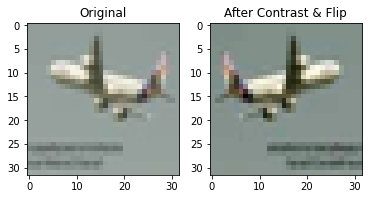

In [29]:
#Function to implement Contrast and horizontal flipping operation 
import numpy as np
import random
def Contrast_Flip(image_6):
    coin=random.randint(0,1) #if coin=1 comes flip image else don't flip
    image_c=image_6.copy()
    aplha=random.uniform(0.5,2.0)
    for p in range(3):
        for q in range(32):
            for r in range(32):
                image_c[q][r][p]=aplha*(image_c[q][r][p]-128)+128
    new_arr = ((image_c - image_c.min()) * (1/(image_c.max() - image_c.min()) * 255)).astype('uint8')
    if (coin):
        new_arr=new_arr[:,::-1,:]
    return new_arr

plt.figure()
plt.subplot(1,2,1)
plt.imshow(data[8062])
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(Contrast_Flip(data[8062]))
plt.title('After Contrast & Flip')


Q-3. Create the augmented training set using the transformation functions implemented in the pre-
vious part. Randomly select one of the four transformations for each image in the training set
and apply it to that image. Combine the transformed images with original training set to get the
augmented training set. Note that the number of examples for the augmented training set will
be twice that of the unaugmented training set. [10 marks]

In [30]:
#Augmented dataset geneneration

import random

functions = [rotation,extractSubMatrix,RandomCrop,Contrast_Flip]    #All four function inside a single list
aug_data_set1={}
aug_data_set2={}
aug_data_set3={}
aug_data_set4={}
aug_data_set5={}

#plt.imshow(random.choice(functions)(data[4000]))   #Randomly selecting a function and applying on a sample image

for i in range(10000):
    aug_data_set1[i]=(random.choice(functions)(data1[i]))
    aug_data_set2[i]=(random.choice(functions)(data2[i]))
    aug_data_set3[i]=(random.choice(functions)(data3[i]))
    aug_data_set4[i]=(random.choice(functions)(data4[i]))
    aug_data_set5[i]=(random.choice(functions)(data5[i]))

#data_set.shape()

In [20]:
#Saving augmented data set into file system
import pickle
file1 = open("aug_data_batch_1.bin", "wb")
file2 = open("aug_data_batch_2.bin", "wb")
file3 = open("aug_data_batch_3.bin", "wb")
file4 = open("aug_data_batch_4.bin", "wb")
file5 = open("aug_data_batch_5.bin", "wb")


pickle.dump(aug_data_set1, file1)
pickle.dump(aug_data_set2, file2)
pickle.dump(aug_data_set3, file3)
pickle.dump(aug_data_set4, file4)
pickle.dump(aug_data_set5, file5)

file1.close()
file2.close()
file3.close()
file4.close()
file5.close()

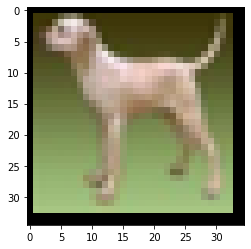

In [43]:
#Reading saved augmented data set
import pickle
import numpy as np
a_file = open("aug_data_batch_1.bin", "rb")
b_file = open("aug_data_batch_2.bin", "rb")
c_file = open("aug_data_batch_3.bin", "rb")
d_file = open("aug_data_batch_4.bin", "rb")
e_file = open("aug_data_batch_5.bin", "rb")

output1 = pickle.load(a_file)
output2 = pickle.load(b_file)
output3 = pickle.load(c_file)
output4 = pickle.load(d_file)
output5 = pickle.load(e_file)

for i in range(10000):
    output1[i]=output1[i]/255
    output2[i]=output2[i]/255
    output3[i]=output3[i]/255
    output4[i]=output4[i]/255
    output5[i]=output5[i]/255

plt.imshow(output1[9999])

Q-4 Use the feature extractor.py file provided with the assignment on the original (unaugmented)
CIFAR-10 dataset and on the augmented dataset to get 1-dimensional input vectors. You can
ignore the implementation of feature extractor.py and use it directly. [10 Marks]
Instructions for using feature-extractor.py:
• Refer to this page : https://pytorch.org/get-started/locally/ for installing the required de-
pendencies of PyTorch. However, if you are using Google Colab or Kaggle for running
your code then you do not need to install PyTorch there, as these environments supports
PyTorch.
2• The feature extractor.py accepts images of size (3×224×224) [Channel×Height×Width].
Use image processing libraries like PIL, CV2 to resize the CIFAR images from (3×32×32)
to (3 × 224 × 224).
• Pass the resized images to feature extraction function of BBResNet18 class to generate
feature vectors
• feature extraction: function expects each image is a numpy.ndarray of dtype: numpy.float32
and shape: [None, 3, 224, 224], where: None represents a variable size. It returns a
numpy.ndarray of dtype: numpy.float32 and shape: [None, 512].

In [32]:
#feature_extractor.py

import torch
import torch.nn as nn
import numpy as np
import torchvision
from torchvision.models import resnet18

def get_name_to_module(model):
    name_to_module = {}
    for m in model.named_modules():
        name_to_module[m[0]] = m[1]
    return name_to_module


def get_activation(all_outputs, name):
    def hook(model, input, output):
        all_outputs[name] = output.detach()

    return hook


def add_hooks(model, outputs, output_layer_names):
    """
    :param model:
    :param outputs: Outputs from layers specified in `output_layer_names` will be stored in `output` variable
    :param output_layer_names:
    :return:
    """
    name_to_module = get_name_to_module(model)
    for output_layer_name in output_layer_names:
        name_to_module[output_layer_name].register_forward_hook(get_activation(outputs, output_layer_name))


class ModelWrapper(nn.Module):
    def __init__(self, model, output_layer_names, return_single=True):
        super(ModelWrapper, self).__init__()
        
        self.model = model
        self.output_layer_names = output_layer_names
        self.outputs = {}
        self.return_single = return_single
        add_hooks(self.model, self.outputs, self.output_layer_names)

    def forward(self, images):
        self.model(images)
        output_vals = [self.outputs[output_layer_name] for output_layer_name in self.output_layer_names]
        if self.return_single:
            return output_vals[0]
        else:
            return output_vals

class BBResNet18(object):
    def __init__(self):
        self.model = resnet18(pretrained=True)
        self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        self.model.eval()

        self.model = ModelWrapper(self.model, ['avgpool'], True)

        self.model.eval()
        self.model.to(self.device)

    def feature_extraction(self, x:np.ndarray):
        '''
            param:
                x: numpy ndarray of shape: [None, 3, 224, 224] and dtype: np.float32
            
            return:
                numpy ndarray (feature vector) of shape: [None, 512] and dtype: np.float32
        '''
        
        x = torch.from_numpy(x).to(self.device)
        
        with torch.no_grad():
            out = self.model(x).cpu().detach()
            out = out.view(out.size(0), -1)
            out = out.numpy()

        return out

In [33]:
#Function to configure images to make compatible with feature_extractor.py
from PIL import Image
import numpy as np

def change_dim(W):
    im=Image.fromarray(W) #converting matrix into image 
    im=im.resize((224,224))                 #resizing that image
    image_array = ((np.array(im)).transpose(2,0,1)).reshape(1,3,224,224) #Getting format of(3,224,224)
    image_array=image_array.astype('float32')
    return image_array


In [34]:
#Feature extraction for main data set
import numpy as np
obj1=BBResNet18()

extra_features=np.empty((50000,512))
for i in range(10000):
    extra_features[i]=obj1.feature_extraction(change_dim(data1[i]))
    extra_features[i+10000]=obj1.feature_extraction(change_dim(data2[i]))
    extra_features[i+20000]=obj1.feature_extraction(change_dim(data3[i]))
    extra_features[i+30000]=obj1.feature_extraction(change_dim(data4[i]))
    extra_features[i+40000]=obj1.feature_extraction(change_dim(data5[i]))

In [35]:
#Saving Extracted feature for main dataset into filesystem
import pickle
filex = open("aug1.bin", "wb")
pickle.dump(extra_features, filex)
filex.close()

In [28]:
#Feature extraction for Augmented data set
import numpy as np
obj2=BBResNet18()

extra_features_aug=np.empty((50000,512))
for i in range(10000):
    extra_features_aug[i]=obj2.feature_extraction(change_dim(aug_data_set1[i]))
    extra_features_aug[i+10000]=obj2.feature_extraction(change_dim(aug_data_set2[i]))
    extra_features_aug[i+20000]=obj2.feature_extraction(change_dim(aug_data_set3[i]))
    extra_features_aug[i+30000]=obj2.feature_extraction(change_dim(aug_data_set4[i]))
    extra_features_aug[i+40000]=obj2.feature_extraction(change_dim(aug_data_set5[i]))

In [37]:
#Feature extraction for Test data set
import numpy as np
obj2=BBResNet18()
extra_features_test=np.empty((10000,512))
for i in range(10000):
    extra_features_test[i]=obj2.feature_extraction(change_dim(test_data[i]))

In [38]:
#Saving Extracted feature for Test data set into filesystem
import pickle
filey = open("aug3.bin", "wb")
pickle.dump(extra_features_test, filey)
filey.close()

In [31]:
#Saving Extracted feature for Augmented data set into filesystem
import pickle
filey = open("aug2.bin", "wb")
pickle.dump(extra_features_aug, filey)
filey.close()


In [8]:
#loading Extracted Test feature from saved file
import pickle
feature_file = open("aug3.bin", "rb")
featurev3 = pickle.load(feature_file)
print(featurev3.shape)
feature_file.close()

(10000, 512)


In [6]:
#loading Main trainngset Extracted feature from saved file
import pickle
feature_file = open("aug1.bin", "rb")
featurev1 = pickle.load(feature_file)
print(featurev1.shape)
feature_file.close()

(50000, 512)


In [63]:
#loading Augmented dataset Extracted feature from saved file
import pickle
feature_file2 = open("aug2.bin", "rb")
featurev2 = pickle.load(feature_file2)
print(featurev2.shape)
feature_file2.close()

(50000, 512)


Q-5. Implement a multi-layer perceptron (MLP) for classification of CIFAR-10 images. Use only a
single hidden layer with 64 neurons and ReLu activation function. The input to this MLP will
be the 1-dimensional vectors generated in the previous step. [10 Marks]

In [4]:
from keras.datasets import cifar10
from keras.utils import np_utils

# load the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

# One hot encoding
nClasses=10
y_train=np_utils.to_categorical(y_train,nClasses)
y_test=np_utils.to_categorical(y_test,nClasses)


2022-02-03 14:07:29.068762: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-03 14:07:29.068900: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

X_train = (featurev1).T
Y_train = y_train.T

X_test = (featurev3).T
Y_test = y_test.T

print("shape of X_train :", X_train.shape)
print("shape of Y_train :", Y_train.shape)
print("shape of X_test :", X_test.shape)
print("shape of Y_test :", Y_test.shape)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    
    w2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

def forward_propagation(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    z1 = np.dot(w1, x) + b1
    a1 = relu(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    
    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    return forward_cache

def cost_function(a2, y):
    m = y.shape[1]
    
    cost = -(1/m)*np.sum(y*np.log(a2))
    
    #cost = -(1/m)*np.sum(np.sum(y*np.log(a2, 0), 1))
    
    return cost

def backward_prop(x, y, parameters, forward_cache):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_relu(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients

def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

def model(x, y, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, parameters)
        
        cost = cost_function(forward_cache['a2'], y)
        
        gradients = backward_prop(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list

def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)
    
    a_out = np.argmax(a_out, 0)  # 0 represents row wise 
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

shape of X_train : (512, 50000)
shape of Y_train : (10, 50000)
shape of X_test : (512, 10000)
shape of Y_test : (10, 10000)


Q-6. Implement the back-propagation algorithm and use it to train the MLP model on: [20 marks]
(a) original training set
(b) augmented training set
You are not allowed to use built in functions that performs back propagation directly. You should
write your own back propagation algorithm.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import random

X_train = (featurev1).T   #Training(Unaugmented) dataset extracted feature vector
Y_train = y_train.T       #one hot encoded class of training dataset

X_test = (featurev3).T   #Test dataset extracted feature vector
Y_test = y_test.T        #one hot encoded class of Test dataset 

print("shape of X_train :", X_train.shape)
print("shape of Y_train :", Y_train.shape)
print("shape of X_test :", X_test.shape)
print("shape of Y_test :", Y_test.shape)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    
    w2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

def forward_propagation(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    z1 = np.dot(w1, x) + b1
    a1 = relu(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    
    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    return forward_cache

def cost_function(a2, y):
    m = y.shape[1]
    
    cost = -(1/m)*np.sum(y*np.log(a2))
    
    #cost = -(1/m)*np.sum(np.sum(y*np.log(a2, 0), 1))
    
    return cost

def backward_prop(x, y, parameters, forward_cache):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_relu(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients

def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

def model(x, y, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, parameters)
        
        cost = cost_function(forward_cache['a2'], y)
        
        gradients = backward_prop(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list

def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)
    
    a_out = np.argmax(a_out, 0)  # 0 represents row wise 
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

shape of X_train : (512, 50000)
shape of Y_train : (10, 50000)
shape of X_test : (512, 10000)
shape of Y_test : (10, 10000)


Cost after 0 iterations is : 2.342320273751447


/tmp/ipykernel_6692/1771469432.py:67: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m)*np.sum(y*np.log(a2))
/tmp/ipykernel_6692/1771469432.py:67: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m)*np.sum(y*np.log(a2))


Cost after 2000 iterations is : 1.8524169162084319
Cost after 4000 iterations is : 1.7463544250932217
Cost after 6000 iterations is : 1.6958786915780948
Cost after 8000 iterations is : 1.689996926170962
Cost after 10000 iterations is : 1.6874242848935397
Cost after 12000 iterations is : 1.6565971952398941
Cost after 14000 iterations is : 1.6126923297582838
Cost after 16000 iterations is : 1.6510001921743964
Cost after 18000 iterations is : 1.5856441990547105


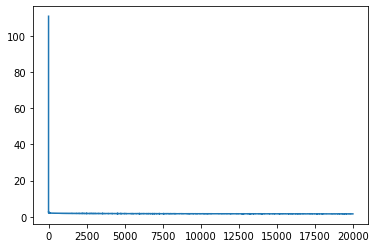

In [61]:
iterations = 20000
n_h = 64 #No. of hidden layers
learning_rate = 0.7
Parameters, Cost_list = model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [70]:
#Saving Weights for Main data set into filesystem
import pickle
filey = open("Main_dataset_Weights.bin", "wb")
pickle.dump(Parameters, filey)
filey.close()

In [12]:
Q-7. Evaluate the performance of the following trained MLP models on the original (unaugmented)
test set: [10 marks]
(a) MLP model, trained on original training set

SyntaxError: invalid syntax (3110079484.py, line 1)

In [62]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Accuracy of Train Dataset 42.358000000000004 %
Accuracy of Test Dataset 41.42 %


Training Model on Augemented dataset extracted features  

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import random

X_train = (featurev2).T  #Training(Augmented) dataset extracted feature vector
Y_train = y_train.T      #one hot encoded class of training(Augmented) dataset

X_test = (featurev3).T    #Test dataset extracted feature vector
Y_test = y_test.T         #one hot encoded class of test dataset

print("shape of X_train :", X_train.shape)
print("shape of Y_train :", Y_train.shape)
print("shape of X_test :", X_test.shape)
print("shape of Y_test :", Y_test.shape)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    
    w2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

def forward_propagation(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    z1 = np.dot(w1, x) + b1
    a1 = relu(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    
    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    return forward_cache

def cost_function(a2, y):
    m = y.shape[1]
    
    cost = -(1/m)*np.sum(y*np.log(a2))
    
    #cost = -(1/m)*np.sum(np.sum(y*np.log(a2, 0), 1))
    
    return cost

def backward_prop(x, y, parameters, forward_cache):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_relu(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients

def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

def model(x, y, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, parameters)
        
        cost = cost_function(forward_cache['a2'], y)
        
        gradients = backward_prop(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list

def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)
    
    a_out = np.argmax(a_out, 0)  # 0 represents row wise 
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

shape of X_train : (512, 50000)
shape of Y_train : (10, 50000)
shape of X_test : (512, 10000)
shape of Y_test : (10, 10000)


Cost after 0 iterations is : 2.374741482402226


/tmp/ipykernel_7220/1771469432.py:67: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m)*np.sum(y*np.log(a2))
/tmp/ipykernel_7220/1771469432.py:67: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m)*np.sum(y*np.log(a2))


Cost after 1000 iterations is : 1.865833264274828
Cost after 2000 iterations is : 1.808928949925249
Cost after 3000 iterations is : 1.775087456402229
Cost after 4000 iterations is : 1.7380029624498168
Cost after 5000 iterations is : 1.715082783277394
Cost after 6000 iterations is : 1.696249089190531
Cost after 7000 iterations is : 1.6883462815578771
Cost after 8000 iterations is : 1.6631369122138422
Cost after 9000 iterations is : 1.6589341442859802


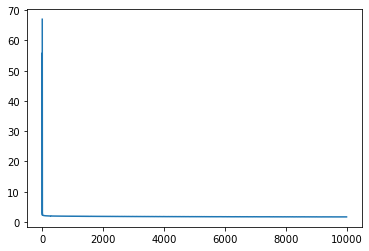

In [11]:
iterations = 10000
n_h = 64 #No. of hidden layers
learning_rate = 0.7
Parameters, Cost_list = model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

Q-7. Evaluate the performance of the following trained MLP models on the original (augmented)
test set: [10 marks]
(b) MLP model, trained on augmented training set

In [15]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Accuracy of Train Dataset 41.510000000000005 %
Accuracy of Test Dataset 40.38 %


In [16]:
#Saving Weights for Augmented data set into filesystem
import pickle
filey = open("Aug_dataset_Weights.bin", "wb")
pickle.dump(Parameters, filey)
filey.close()